In [3]:
import numpy as np
import pylab as plt
import networkx as nx

In [2]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

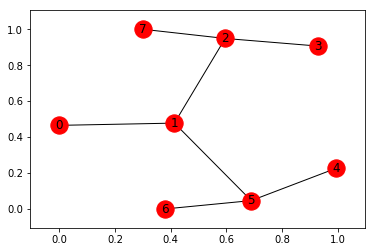

In [16]:
goal = 7

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [24]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [25]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0
        
    # the graph is oriented so we need to set symmetric weigths when we traverse it from the other direction
    if point[0] == goal:
#         print('point: ', point, point[::-1])
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0
#         print('>point: ', point, point[::-1])

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])

In [45]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 
available_act

array([0, 2, 5], dtype=int64)

In [36]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)
action

5

In [44]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    print('Q', Q[action,], max_index)
    if max_index.shape[0] > 1: # if we have multiple state with the same maximum reward, choose a random one
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    print('max_index ', max_index, 'max value ', max_value)
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('current_state, action, max_value',current_state, action, R[current_state, action] + gamma * max_value)
#     print(Q)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

Q [[   0.     188.928    0.     188.928    0.       0.       0.     295.2  ]] [7]
max_index  7 max value  295.2
current_state, action, max_value 1 2 236.16


632.0

In [46]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Q [[ 0.  0.  0.  0.  0.  0.  0.  0.]] [0 1 2 3 4 5 6 7]
max_index  2 max value  0.0
current_state, action, max_value 3 2 0.0
Score: 0
Q [[ 0.  0.  0.  0.  0.  0.  0.  0.]] [0 1 2 3 4 5 6 7]
max_index  3 max value  0.0
current_state, action, max_value 5 1 0.0
Score: 0
Q [[ 0.  0.  0.  0.  0.  0.  0.  0.]] [0 1 2 3 4 5 6 7]
max_index  5 max value  0.0
current_state, action, max_value 6 5 0.0
Score: 0
Q [[ 0.  0.  0.  0.  0.  0.  0.  0.]] [0 1 2 3 4 5 6 7]
max_index  3 max value  0.0
current_state, action, max_value 7 7 100.0
Score: 100.0
Q [[ 0.  0.  0.  0.  0.  0.  0.  0.]] [0 1 2 3 4 5 6 7]
max_index  1 max value  0.0
current_state, action, max_value 3 2 0.0
Score: 100.0
Q [[ 0.  0.  0.  0.  0.  0.  0.  0.]] [0 1 2 3 4 5 6 7]
max_index  3 max value  0.0
current_state, action, max_value 7 2 0.0
Score: 100.0
Q [[   0.    0.    0.    0.    0.    0.    0.  100.]] [7]
max_index  7 max value  100.0
current_state, action, max_value 7 7 180.0
Score: 100.0
Q [[   0.    0.    0.    0.    0.    0

current_state, action, max_value 1 5 124.928
Score: 520.938690978
Q [[   0.       0.     195.2      0.       0.     124.928    0.       0.   ]] [2]
max_index  2 max value  195.2
current_state, action, max_value 0 1 156.16
Score: 520.938690978
Q [[   0.    156.16    0.      0.      0.      0.      0.      0.  ]] [1]
max_index  1 max value  156.16
current_state, action, max_value 1 0 124.928
Score: 554.239156024
Q [[ 124.928    0.     195.2      0.       0.     124.928    0.       0.   ]] [2]
max_index  2 max value  195.2
current_state, action, max_value 5 1 156.16
Score: 554.239156024
Q [[ 124.928    0.     195.2      0.       0.     124.928    0.       0.   ]] [2]
max_index  2 max value  195.2
current_state, action, max_value 0 1 156.16
Score: 554.239156024
Q [[   0.    156.16    0.    156.16    0.      0.      0.    244.  ]] [7]
max_index  7 max value  244.0
current_state, action, max_value 7 2 195.2
Score: 554.239156024
Q [[ 0.  0.  0.  0.  0.  0.  0.  0.]] [0 1 2 3 4 5 6 7]
max_inde

current_state, action, max_value 1 0 239.243442793
Score: 917.877810867
Q [[   0.          299.05430349    0.            0.           99.9424        0.
   191.39475423    0.        ]] [1]
max_index  1 max value  299.054303491
current_state, action, max_value 4 5 239.243442793
Score: 917.877810867
Q [[   0.          299.05430349    0.            0.           99.9424        0.
   191.39475423    0.        ]] [1]
max_index  1 max value  299.054303491
current_state, action, max_value 6 5 239.243442793
Score: 917.877810867
Q [[   0.          299.05430349    0.          299.05430349    0.            0.
     0.          467.2723492 ]] [7]
max_index  7 max value  467.272349204
current_state, action, max_value 3 2 373.817879364
Score: 917.877810867
Q [[ 239.24344279    0.          373.81787936    0.            0.
   239.24344279    0.            0.        ]] [2]
max_index  2 max value  373.817879364
current_state, action, max_value 0 1 299.054303491
Score: 917.877810867
Q [[   0.          299.0

current_state, action, max_value 0 1 317.188716203
Score: 970.774519088
Q [[   0.          317.1887162     0.          318.20077837    0.            0.
     0.          499.07879853]] [7]
max_index  7 max value  499.078798525
current_state, action, max_value 1 2 399.26303882
Score: 971.330973013
Q [[   0.          317.1887162     0.          318.20077837    0.            0.
     0.          499.07879853]] [7]
max_index  7 max value  499.078798525
current_state, action, max_value 3 2 399.26303882
Score: 971.330973013
Q [[   0.          317.1887162     0.            0.          191.39475423
     0.          191.39475423    0.        ]] [1]
max_index  1 max value  317.188716203
current_state, action, max_value 6 5 253.750972963
Score: 971.330973013
Q [[   0.            0.            0.            0.            0.
   253.75097296    0.            0.        ]] [5]
max_index  5 max value  253.750972963
current_state, action, max_value 5 6 203.00077837
Score: 973.656462329
Q [[ 253.75097296  

current_state, action, max_value 6 5 255.698140701
Score: 982.186795394
Q [[   0.            0.          399.52834485    0.            0.            0.
     0.          499.75851256]] [7]
max_index  7 max value  499.758512561
current_state, action, max_value 7 7 499.806810049
Score: 982.101547644
Q [[ 255.6981407     0.          399.52834485    0.            0.
   255.52834485    0.            0.        ]] [2]
max_index  2 max value  399.528344845
current_state, action, max_value 5 1 319.622675876
Score: 982.101547644
Q [[ 255.6981407     0.          399.52834485    0.            0.
   255.52834485    0.            0.        ]] [2]
max_index  2 max value  399.528344845
current_state, action, max_value 0 1 319.622675876
Score: 982.101547644
Q [[   0.            0.          399.80681005    0.            0.            0.
     0.            0.        ]] [2]
max_index  2 max value  399.806810049
current_state, action, max_value 2 3 319.845448039
Score: 982.101547644
Q [[   0.          319.6

   255.98937927    0.            0.        ]] [5]
max_index  5 max value  255.98937927
current_state, action, max_value 5 6 204.791503416
Score: 982.685718558
Q [[   0.            0.            0.            0.            0.
   255.98937927    0.            0.        ]] [5]
max_index  5 max value  255.98937927
current_state, action, max_value 5 6 204.791503416
Score: 982.685718558
Q [[ 255.98937927    0.          399.98340511    0.            0.
   255.98937927    0.            0.        ]] [2]
max_index  2 max value  399.98340511
current_state, action, max_value 2 1 319.986724088
Score: 982.695724484
Q [[   0.          319.98672409    0.            0.          204.75948513
     0.          204.79150342    0.        ]] [1]
max_index  1 max value  319.986724088
current_state, action, max_value 4 5 255.98937927
Score: 982.695724484
Q [[ 255.98937927    0.          399.98340511    0.            0.
   255.98937927    0.            0.        ]] [2]
max_index  2 max value  399.98340511
curre

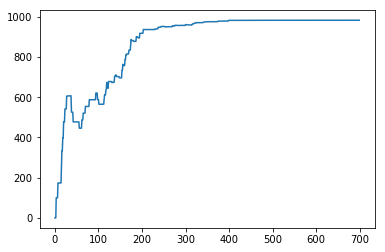

In [47]:
plt.plot(scores)
plt.show()

In [50]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    print('next_step_index ', next_step_index)
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)
Q

next_step_index  [1]
next_step_index  [2]
next_step_index  [7]
Most efficient path:
[0, 1, 2, 7]


matrix([[   0.        ,  319.9965198 ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ],
        [ 255.99721584,    0.        ,  399.99564975,    0.        ,
            0.        ,  255.98937927,    0.        ,    0.        ],
        [   0.        ,  319.98672409,    0.        ,  319.99564975,
            0.        ,    0.        ,    0.        ,  499.99456219],
        [   0.        ,    0.        ,  399.99564975,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,  255.98937927,    0.        ,    0.        ],
        [   0.        ,  319.98672409,    0.        ,    0.        ,
          204.79150342,    0.        ,  204.79150342,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,  255.98937927,    0.        ,    0.        ],
        [   0.        ,    

In [ ]:
plt.plot(scores)
plt.show()

## Second version - environment knowledge

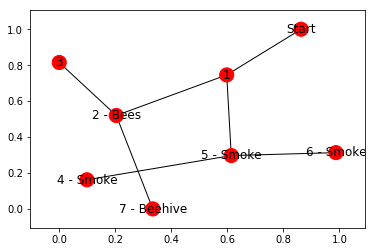

In [54]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [55]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)
action

0

In [57]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_bees[current_state, action] += 1

    if 's' in environment: 
        enviro_smoke[current_state, action] += 1

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state,action,gamma)

max_value 0.0


0

In [58]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 80.0
max_value 80.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 100.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 180.0
max_value 0.0
max_value 64.0
max_value 0.0
max_value 144.0
max_value 144.0
max_value 0.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 215.2
max_value 0.0
max_value 0.0
max_value 144.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 272.16
max_value 217.728
max_value 0.0
max_value 0.0
max_value 0.0
ma

In [59]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))


max_value 0.0
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.555555556
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 155.555555556
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 155.555555556
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 155.555555556
max_value 0.0
Score: 155.555555556
max_value 144.0
Score: 235.555555556
max_value 144.0
Score: 315.555555556
max_value 144.0
Score: 315.555555556
max_value 144.0
Score: 315.555555556
max_value 215.2
Score: 317.472118959
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 317.472118959
max_value 0.0
Score: 317.472118959
max_value 0.0
Score: 317.472118959
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 317.472118959
max_value 272.16
Score: 284.891240447
max_value 217.728
Score: 311.981187537
max_value 274.1824
Score: 331.192082351
max_value 217.728
Score: 358.082210966
max_value 0.0
Score: 358.082210966
going from: [0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


Score: 730.36999401
max_value 182.004088832
Score: 730.36999401
going from: [1 4 6]
to: [1]
max_value 304.48193269
Score: 746.157340919
max_value 304.48193269
Score: 761.944687828
max_value 380.602415863
Score: 761.944687828
max_value 304.48193269
Score: 777.732034738
going from: [0 2 5]
to: [0 2]
max_value 243.585546152
Score: 790.361912265
max_value 380.602415863
Score: 790.361912265
going from: [0 2 5]
to: [0 2]
max_value 380.602415863
Score: 790.361912265
going from: [0 2 5]
to: [0 2]
max_value 243.585546152
Score: 790.361912265
max_value 243.585546152
Score: 802.991789792
max_value 243.585546152
Score: 802.991789792
max_value 243.585546152
Score: 802.991789792
max_value 243.585546152
Score: 815.62166732
max_value 490.068436922
Score: 814.410494032
max_value 243.585546152
Score: 814.410494032
going from: [1 4 6]
to: [1]
max_value 304.48193269
Score: 814.410494032
max_value 243.585546152
Score: 814.410494032
max_value 304.48193269
Score: 814.410494032
going from: [0 2 5]
to: [0 2]
m

to: [1]
max_value 319.650564189
Score: 849.214077548
max_value 319.650564189
Score: 849.214077548
max_value 255.720451351
Score: 849.214077548
max_value 255.720451351
Score: 849.214077548
max_value 399.885496874
Score: 849.214077548
max_value 255.720451351
Score: 849.214077548
max_value 319.650564189
Score: 849.214077548
going from: [0 2 5]
to: [0 2]
max_value 255.720451351
Score: 849.214077548
max_value 319.908397499
Score: 849.214077548
max_value 255.720451351
Score: 849.214077548
max_value 399.885496874
Score: 849.214077548
max_value 255.720451351
Score: 849.214077548
going from: [0 2 5]
to: [0 2]
max_value 255.720451351
Score: 849.214077548
max_value 255.720451351
Score: 849.214077548
going from: [1 4 6]
to: [1]
max_value 319.650564189
Score: 849.214077548
max_value 255.720451351
Score: 849.214077548
max_value 499.908397499
Score: 849.185482524
max_value 319.650564189
Score: 849.185482524
max_value 319.650564189
Score: 849.185482524
max_value 499.908397499
Score: 849.190063488
max_

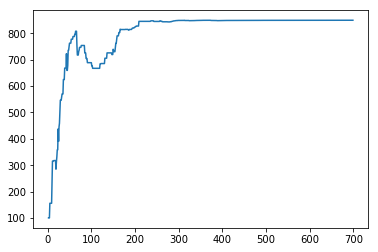

In [60]:
update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

plt.plot(scores)
plt.show()